# Same notebook as breakout.ipynb, but using OpenAI's atari wrappers instead

In [1]:
import sys
sys.path.append('..')

In [2]:
from agents.ddqn import *
from environments.openai import *
from utils.train import *
from utils.logger import *
from utils.render import *

In [3]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [4]:
# initialize environment
raw_env = gym.make('BreakoutNoFrameskip-v4')
env = Wrap_Deepmind(raw_env)

### Scaling hyperparameters in accordance with environment parameter changes
#### num_steps += 1 represents 4 frames (so really num_steps += 4)

In [5]:
# initialize agent
observation_space = raw_env.observation_space
action_space = raw_env.action_space

params = {'epsilon':1.0, 'epsilon_min':0.1, 'epsilon_decay': None, 'eps_ff': 1000000, 'eps_interval':0.9, 'eps_start':1.0, 'gamma':0.99, 'alpha':2.5e-5, 
          'network_params': None, 'memory_size':150000, 'device':'cuda:0', 'batch_size':32, 'target_net_updates':2500}

agent = DQNAgent(observation_space, action_space, **params)

In [6]:
agent.network

DeepmindCNN(
  (network): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=512, bias=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=4, bias=True)
  )
)

In [7]:
logger = Logger('training_info')

In [8]:
save_dir = '../models/breakout/'
training_params = {'total_steps':12000000, 'logger':logger, 'save_freq':100000, 'e_verbose':500000, 'file_name': 'breakout ddqn 2', 'save_dir':save_dir}

### Deepmind Atari Preprocesing:
* Extremely high RAM usage
* Frameskips between stacked inputs
    * Each input spans 16 frames
* Inputs have overlap
    * (x1, x2, x3, x4) --env.step--> (x2, x3, x4, x5)
    * x1 and x2 differ by 4 frames
* READ: https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/

### My Atari Preprocessing:
* Lower RAM usage
* No frameskips between stacked inputs. 
    * Each input spans 4 frames
* No overlap between frames unless environment termination
    * (x1, x2, x3, x4) --env.step--> (x5, x6, x7, x8)

In [9]:
standard_train(agent, env, **training_params)

Episode 544: Saved model weights and log.
Episode 1046: Saved model weights and log.
Episode 1489: Saved model weights and log.
Episode 1873: Saved model weights and log.
Steps : 500000, Average Reward: 2.5944970681100585, Memory Length: 150000, Optimizer Steps: 500000, Time Elapsed: 4347.873561859131, Target Q Updates: 200
Episode 2217: Saved model weights and log.
Episode 2533: Saved model weights and log.
Episode 2818: Saved model weights and log.
Episode 3072: Saved model weights and log.
Episode 3317: Saved model weights and log.
Steps : 1000000, Average Reward: 8.869532428355958, Memory Length: 150000, Optimizer Steps: 1000000, Time Elapsed: 3928.729994058609, Target Q Updates: 400
Episode 3543: Saved model weights and log.
Episode 3783: Saved model weights and log.
Episode 4038: Saved model weights and log.
Episode 4292: Saved model weights and log.
Episode 4531: Saved model weights and log.
Steps : 1500000, Average Reward: 17.975550122249388, Memory Length: 150000, Optimizer St

# if doesnt work, change noop, monitor, and firereset. all useless. also make it so the user can specify which environments to use.

In [8]:
path = '../models/breakout/breakout ddqn 2.pth'
save = '../models/breakout/breakout ddqn 2 final.pth'

In [12]:
agent.save(save)

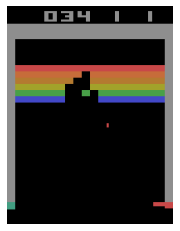

In [ ]:
render_agent(agent, env, save, 3)